<a href="https://colab.research.google.com/github/ThierrryScotto/movie_reviews/blob/main/movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [59]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

# Getting the data

In [33]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [34]:
train_data.ndim

1

In [35]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [36]:
max([max(sequence) for sequence in train_data])

9999

## Decodeding one of these reviews back to English words

In [37]:
word_index = imdb.get_word_index()

reverse_word_index = dict([ (value, key) for (key, value) in word_index.items() ])
recoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [38]:
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

# Preparing the data

In [39]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [40]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [41]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [42]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [43]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [44]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

# Building the model

In [45]:
len(x_train[0])

10000

In [48]:
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

In [49]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Validating the model

In [52]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 119ms/step - loss: 0.5718 - accuracy: 0.7582 - val_loss: 0.4522 - val_accuracy: 0.8552
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3673 - accuracy: 0.8862 - val_loss: 0.3516 - val_accuracy: 0.8638
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2732 - accuracy: 0.9121 - val_loss: 0.2952 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2176 - accuracy: 0.9289 - val_loss: 0.2779 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1823 - accuracy: 0.9399 - val_loss: 0.2949 - val_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1536 - accuracy: 0.9516 - val_loss: 0.2835 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1361 - accuracy: 0.9569 - val_loss: 0.2884 - val_accuracy: 0.8863
Epoch 8/20
3

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

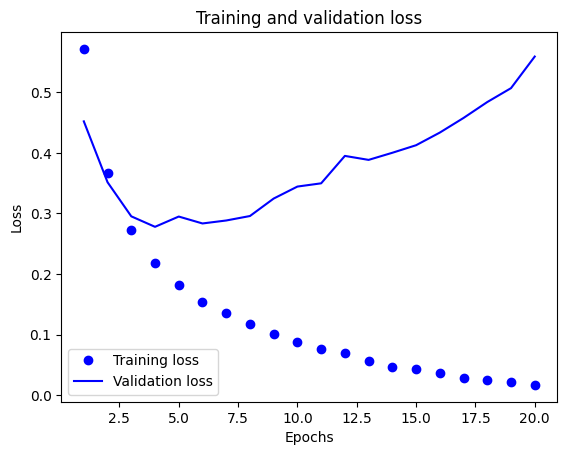

In [56]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

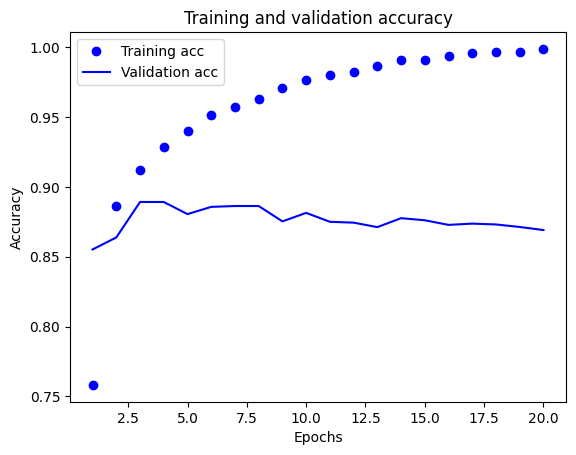

In [58]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Using 4 epochs

In [60]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 38ms/step - loss: 0.4664 - accuracy: 0.8155
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2760 - accuracy: 0.9014
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2160 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2823 - accuracy: 0.8877


In [63]:
print(f"Loss: {results[0]}\nAccuracy: {results[1]}")

Loss: 0.2823063135147095
Accuracy: 0.887719988822937


In [68]:
predicted_values = model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


In [69]:
predicted_values

array([[0.17459546],
       [0.9995921 ],
       [0.704179  ],
       ...,
       [0.09716587],
       [0.07109334],
       [0.6083064 ]], dtype=float32)